In [9]:
import pandas as pd 
import numpy as np

cus = pd.read_json("dim_customer.json")
inv = pd.read_csv("fct_invoice.csv")

In [13]:
#How many unique customers are in the dataset?

len(inv['customer_id'].unique())

#answer: 5191

5191

In [15]:
#What are the different categories of products available? How many unique categories are there?

for i in inv['category'].unique():
    print(i)

len(inv['category'].unique())

#answer: 8 categories Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir

Clothing
Shoes
Books
Cosmetics
Food & Beverage
Toys
Technology
Souvenir


8

In [17]:
#Which payment method is the most popular? How many times was it used?

inv['payment_method'].value_counts()

#answer: Cash, 44447 times used

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [95]:
#What are the three most popular categories, by total sales?

inv['sales'] = inv['quantity'] * inv['price']

inv.groupby(by=['category']).sum()['sales']

#answer: clothing-1.139968e+08, shoes-6.655345e+07, technology-5.786235e+07

category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
Name: sales, dtype: float64

In [15]:
#What are the total sales attributed to customers over the age of 45?

new = pd.merge(inv, cus, left_on = 'customer_id', right_on = 'id', how = 'outer')
new['sales'] = new['quantity'] * new['price']

filtered = new[new['age'] > 45]
total = filtered['sales'].sum()
total

#answer: 82039768.15

82039768.15

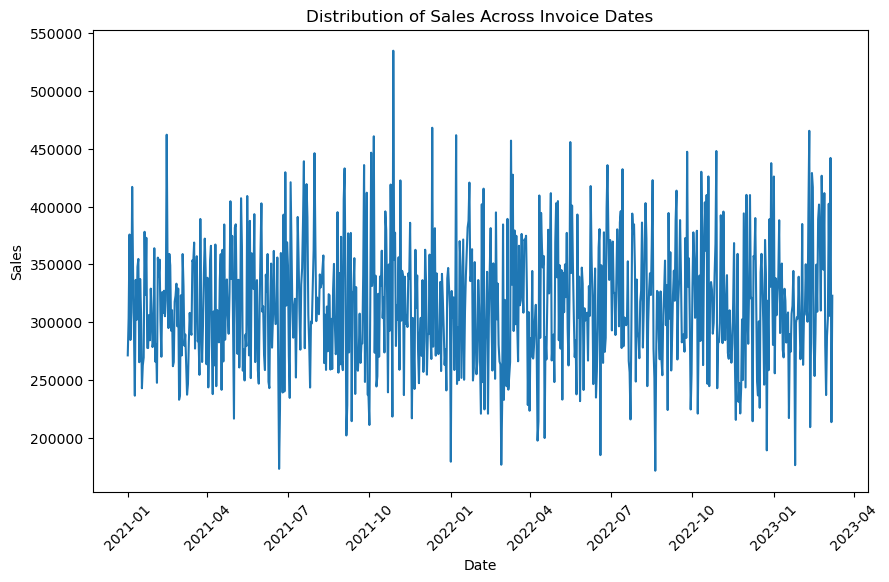

In [107]:
#How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

import matplotlib.pyplot as plt

new['date'] = pd.to_datetime(new['invoice_date'],format='%d/%m/%Y')
thing = new.groupby('date')['sales'].sum()

plt.figure(figsize=(10,6))
plt.plot(thing)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Distribution of Sales Across Invoice Dates')
plt.xticks(rotation=45)
plt.show()

#answer: The sales is distributed randomly across the different invoice dates and presents no apparent seasonal trends or patterns

In [141]:
#Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).


piv = pd.merge(inv, cus, left_on = 'customer_id', right_on = 'id', how = 'outer')
piv['total_sales'] = piv['quantity'] * piv['price']

piv['age_range'] = (piv['age']//10 * 10).astype(str) + "-" + (piv['age']//10 * 10 + 9).astype(str)
pd.pivot_table(piv, values = 'total_sales', index = 'category', columns = 'age_range', aggfunc=['sum','mean'],fill_value = 0)

#table = pd.pivot_table(y

sum                                         \
age_range         10.0-19.0    20.0-29.0    30.0-39.0    40.0-49.0   
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

                                                                   \
age_range          50.0-59.0    60.0-69.0   70.0-79.0   80.0-89.0   
category                                                            
Books               74962.20     80476.80    54827.85    26664.00   
Clothing         10321851.76  10660642.08  7769371.28  4493698.00   
Cosmetics          587780.96    649990.76   419082.62   254531.60   
Food & Beverage     72425.04     80976.09    55050.98    31332.93   
Shoes             5852857.84   5978893.54  4480269.05  2628744.60   
Souvenir            54943.32     55025.43    38673.81    23718.06   
Technology        4435200.00   5471550.00  3638250.00  1946700.00   
Toys               345067.52    363955.20   273244.16   153932.80   

                                      mean                              \
age_range            nan-nan     10.0-19.0     20.0-29.0     30.0-39.0   
category                                                                 
Books              334012.05    170.690000    167.287895    165.962722   
Clothing         46003764.40   3423.470409   3235.711111   3350.288274   
Cosmetics         2777362.62    466.465362    447.169978    442.264487   
Food & Beverage    345875.59     60.365822     54.763010     57.932842   
Shoes            26468097.17   6492.034967   6568.601153   7045.831370   
Souvenir           265661.04    137.501667    121.287682    128.700241   
Technology       23865450.00  13291.764706  11488.100437  11665.340909   
Toys              1587210.24    364.013494    416.775758    390.875836   

                                                                         \
age_range           40.0-49.0     50.0-59.0     60.0-69.0     70.0-79.0   
category                                                                  
Books              170.987059    162.255844    172.696996    156.204701   
Clothing          3291.808019   3345.819047   3280.197563   3307.522895   
Cosmetics          447.232656    442.273108    451.069230    444.886008   
Food & Beverage     57.149515     55.668747     56.626636     57.887466   
Shoes             6801.152004   6688.980389   6763.454231   6627.616938   
Souvenir           134.124848    128.974930    123.652652    127.216480   
Technology       11363.645038  11430.927835  10921.257485  11774.271845   
Toys               390.906880    396.629333    386.364331    403.610281   

                                             
age_range           80.0-89.0       nan-nan  
category                                     
Books              153.241379    170.327409  
Clothing          3301.761940   3306.055652  
Cosmetics          427.066443    457.103789  
Food & Beverage     56.455730     58.632919  
Shoes             6917.748947   6441.493592  
Souvenir           126.159894    126.505257  
Technology       10936.516854  11785.407407  
Toys               373.623301    394.828418